# Libraries

In [316]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '.'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [317]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from src import data, returns
from src.portfolio import PortfolioData

# Orders and Porfolio Data

In [318]:
orders_df = data.load_orders('data/orders.csv')
portfolio_data = PortfolioData(orders_df, assets = ['SOXX', 'DHR', 'COST'])

[*********************100%***********************]  3 of 3 completed


/Users/calvindelima/projects/investing/.venv/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



# Portfolio State / Value

In [319]:
portfolio_state = (
  portfolio_data
    .portfolio_snapshot
    .sort_index()
    .tail(1)
)
portfolio_state

,portfolio_cost_usd,portfolio_value_usd
snapshot_date,,
2021-07-22,7015.42,7864.824951


In [5]:
portfolio_state['portfolio_value_usd'].values[0]

7747.975082397461

In [6]:
(
  portfolio_data
    .portfolio_snapshot
    .sort_index()
    .tail(1)
    .diff(axis = 1)
    .iloc[0, 1]
)

732.5550823974609

In [7]:
(
  portfolio_data
    .portfolio_snapshot
    .sort_index()
    .tail(1)
)

,portfolio_cost_usd,portfolio_value_usd
snapshot_date,,
2021-07-16,7015.42,7747.975082


In [320]:
performance = portfolio_data.summarize()

TypeError: __init__() missing 1 required positional argument: 'annualized_return'

In [ ]:
from src import returns

# Wide Data

In [321]:
wide_prices_snapshot = (
  portfolio_data
    .prices_snapshot
    .pivot(columns = 'asset', values = 'unit_price_usd')
)

# weighted_returns_snapshot = (returns.compute_period_returns(
#   wide_prices_snapshot,
#   30
# ) * (1/wide_prices_snapshot.shape[1])).sum(axis = 1)

# weighted_returns_snapshot

In [322]:
asset_snapshot_cost_wide = (
  portfolio_data
    .asset_snapshot
    .pivot(columns = 'asset', values = 'asset_cost_usd')
)
asset_snapshot_cost_wide.head()

asset,COST,DHR,SOXX
snapshot_date,,,
2021-04-06,720.24,NaN,NaN
2021-04-07,720.24,NaN,NaN
2021-04-08,720.24,NaN,NaN
2021-04-09,1083.45,1161.8,893.6
2021-04-12,1083.45,1161.8,893.6


In [323]:
asset_snapshot_value_wide = (
  portfolio_data
    .asset_snapshot
    .pivot(columns = 'asset', values = 'asset_value_usd')
)
asset_snapshot_value_wide.head()

asset,COST,DHR,SOXX
snapshot_date,,,
2021-04-06,719.150238,NaN,NaN
2021-04-07,718.913055,NaN,NaN
2021-04-08,723.247894,NaN,NaN
2021-04-09,1085.015442,1155.795898,890.836761
2021-04-12,1090.305313,1165.541039,885.932495


# Asset Allocation

In [324]:
assest_cost_allocation_snapshot_wide = asset_snapshot_cost_wide.div(
  portfolio_data.portfolio_snapshot['portfolio_cost_usd'],
  axis = 0
)

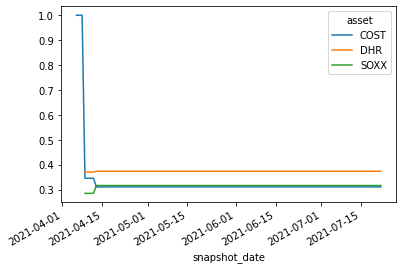

In [325]:
assest_cost_allocation_snapshot_wide.plot();

In [326]:
assest_value_allocation_snapshot_wide = asset_snapshot_cost_wide.div(
  portfolio_data.portfolio_snapshot['portfolio_value_usd'],
  axis = 0
)

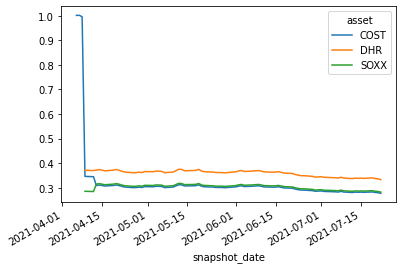

In [327]:
assest_value_allocation_snapshot_wide.plot();

# Returns Data

In [328]:
returns_snapshot_30d = returns.compute_period_returns(
  wide_prices_snapshot,
  30
)
returns_snapshot_30d.tail(1)

asset,COST,DHR,SOXX
price_date,,,
2021-07-22,0.096518,0.18939,0.028921


In [329]:
current_allocation = (
  assest_value_allocation_snapshot_wide
    .tail(1)
    .squeeze()
)
current_allocation

asset
COST    0.277067
DHR     0.332981
SOXX    0.281952
Name: 2021-07-22 00:00:00, dtype: float64

In [330]:
expected_returns_snapshot = (
  returns_snapshot_30d
    .multiply(current_allocation, axis = 1)
    .sum(axis = 1)
)
expected_returns_snapshot.tail(1)

price_date
2021-07-22    0.097959
dtype: float64

In [331]:
display(current_allocation)
display(returns_snapshot_30d.tail(1))

asset
COST    0.277067
DHR     0.332981
SOXX    0.281952
Name: 2021-07-22 00:00:00, dtype: float64

asset,COST,DHR,SOXX
price_date,,,
2021-07-22,0.096518,0.18939,0.028921


In [332]:
returns_snapshot_30d.tail(1).values

array([[0.09651792, 0.18938952, 0.02892092]])

In [333]:
np.dot(current_allocation.values, returns_snapshot_30d.tail(1).values.T)

array([0.09795937])

In [335]:
# assert np.isclose(
#   np.dot(current_allocation.values, returns_snapshot_30d.tail(1).values.T)[0],
#   0.034381
# )

In [336]:
portfolio_returns = returns.PortfolioReturns(portfolio_data)

days_since_inception = portfolio_data.days_since_inception
days_since_inception
print('Days since inception:', days_since_inception)

inception_returns_snapshot = returns.compute_period_returns(
  periodic_snapshot = wide_prices_snapshot,
  periods = days_since_inception
)

Days since inception: 107


In [337]:
orders_df

,order_id,asset,order_date,unit_cost_usd,order_units,order_cost_usd
0,1,COST,2021-04-06,360.12,2,720.24
1,2,COST,2021-04-09,363.21,1,363.21
2,3,COST,2021-04-13,365.21,3,1095.63
3,4,COUR,2021-04-05,49.61,16,793.76
4,5,DHR,2021-04-09,232.36,5,1161.80
5,6,DHR,2021-04-13,242.84,6,1457.04
6,7,SOXX,2021-04-09,446.80,2,893.60
7,8,SOXX,2021-04-13,441.30,3,1323.90
8,9,POW.TO,2021-05-21,32.33,5,161.66


price_date
2021-07-22    0.128348
dtype: float64


NameError: name 'performance' is not defined

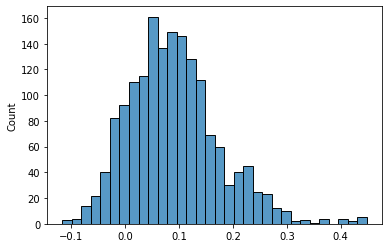

In [338]:
expected_returns_snapshot = (
  inception_returns_snapshot
    .multiply(current_allocation, axis = 1)
    .sum(axis = 1)
)
print(expected_returns_snapshot.tail(1))

sns.histplot(expected_returns_snapshot.loc['2015-01-01':])
plt.axvline(performance.percent_return, color='darkred', ls='--')

plt.axvline(0, color='black');

expected_returns_snapshot.describe().to_frame().T

In [339]:
portfolio_returns.expected_returns_snapshot.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
0,10669.0,0.058743,0.11168,-0.382249,-0.008494,0.054969,0.118392,0.874545


In [340]:
inception_returns_snapshot = returns.compute_period_returns(
  periodic_snapshot = wide_prices_snapshot,
  periods = days_since_inception - 1
)

# print(inception_returns_snapshot.tail(1))

expected_returns_snapshot = returns.annualize_returns(
  inception_returns_snapshot
    .multiply(current_allocation, axis = 1)
    .sum(axis = 1)
, days_since_inception)
expected_returns_snapshot
# print(expected_returns_snapshot.tail(1))

# sns.histplot(expected_returns_snapshot.loc['2015-01-01':])
# plt.axvline(performance.percent_return, color='darkred', ls='--')

# plt.axvline(0, color='black');

# expected_returns_snapshot.describe().to_frame().T

234.65019772566384

asset           COST       DHR      SOXX
price_date                              
2021-07-22  0.298899  0.323044  0.125579
0.10854280271853524


,count,mean,std,min,25%,50%,75%,max
0,10669.0,0.05319,0.105693,-0.364012,-0.01192,0.049064,0.112874,0.868879


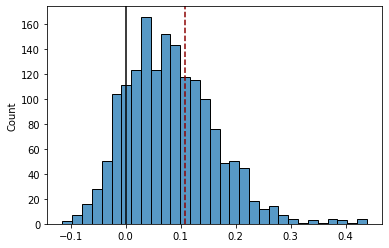

In [341]:
inception_returns_snapshot = returns.compute_period_returns(
  periodic_snapshot = wide_prices_snapshot,
  periods = days_since_inception - 10
)

print(inception_returns_snapshot.tail(1))

expected_returns_snapshot = (
  inception_returns_snapshot
    .multiply(current_allocation, axis = 1)
    .sum(axis = 1)
)
print(expected_returns_snapshot.iloc[-10])

sns.histplot(expected_returns_snapshot.loc['2015-01-01':])
plt.axvline(expected_returns_snapshot.iloc[-10], color='darkred', ls='--')

plt.axvline(0, color='black');

expected_returns_snapshot.describe().to_frame().T

Tail statistics are probably stable but the mean and standard deviation likely change more over time.

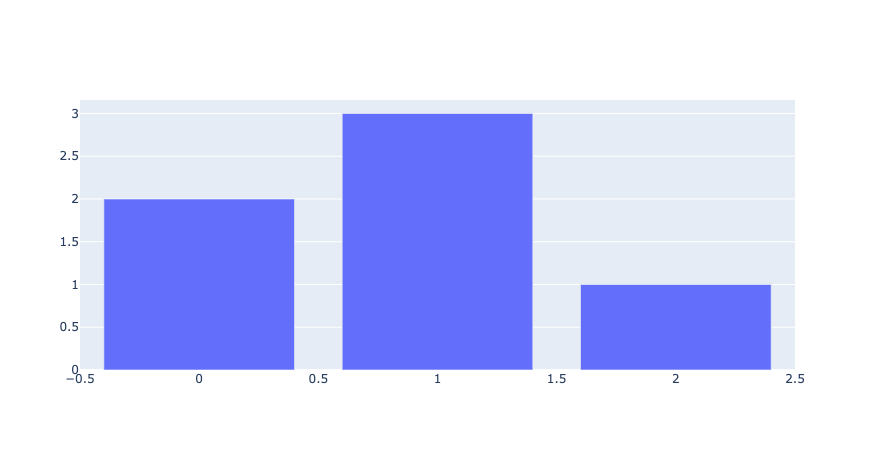

In [342]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()

In [343]:
market_data_df = (
  data.get_market_data(['POW.TO', 'COUR'], interval = '1d')
)

prices_df = (
  ((market_data_df['adjusted_close'] + market_data_df['open']) / 2)
    # Move date to columns
    .reset_index()
    .melt(
      id_vars = ['date'],
      value_name = 'unit_price_usd',
      var_name = 'asset'
    )
    .rename(columns = {'date': 'price_date'})
)

[*********************100%***********************]  2 of 2 completed


/Users/calvindelima/projects/investing/.venv/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [344]:
prices_df.tail()

,price_date,asset,unit_price_usd
13335,2021-07-16,POW.TO,38.984999
13336,2021-07-19,POW.TO,38.475000
13337,2021-07-20,POW.TO,38.570002
13338,2021-07-21,POW.TO,39.120001
13339,2021-07-22,POW.TO,39.165001


In [152]:
import pandas as pd

In [176]:
new_prices_df = (
  prices_df
    .assign(unit_price_usd = lambda df: 
      df.groupby('asset')['unit_price_usd'].transform(lambda grp: grp.ffill())
    )    
)
new_prices_df.query('price_date == "2021-05-31"')

,price_date,asset,unit_price_usd
6632,2021-05-31,COUR,37.895000
13269,2021-05-31,POW.TO,39.429998


In [177]:
prices_df.query('asset == "COUR" & price_date < "2021-05-31"').tail()

,price_date,asset,unit_price_usd
6627,2021-05-24,COUR,37.510000
6628,2021-05-25,COUR,37.280001
6629,2021-05-26,COUR,37.670000
6630,2021-05-27,COUR,37.885000
6631,2021-05-28,COUR,37.895000


In [181]:
portfolio_data.portfolio_snapshot.tail()

,portfolio_cost_usd,portfolio_value_usd
snapshot_date,,
2021-05-18,7015.42,7070.164970
2021-05-19,7015.42,6994.375053
2021-05-20,7015.42,7129.479942
2021-05-21,7015.42,7175.214989
2021-05-24,7015.42,7205.032211


In [185]:
portfolio_data.order_snapshot.tail()

,asset,price_date,order_id,order_units,unit_price_usd,order_cost_usd,order_value_usd
order_date,,,,,,,
2021-04-13,DHR,2021-04-15,6,6,240.354996,1457.04,1442.129974
2021-04-13,DHR,2021-04-14,6,6,239.485001,1457.04,1436.910004
2021-04-13,DHR,2021-04-13,6,6,240.629997,1457.04,1443.779984
2021-04-13,DHR,2021-05-24,6,6,254.044998,1457.04,1524.269989
2021-04-13,SOXX,2021-05-24,8,3,421.434998,1323.90,1264.304993


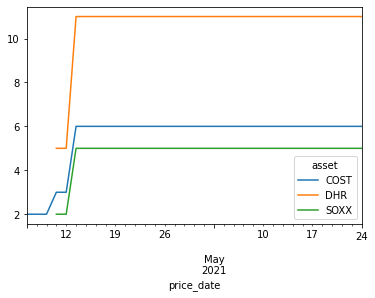

In [199]:
wide_asset_snapshot = (
  portfolio_data.order_snapshot
    .pivot_table(columns = 'asset', values = 'order_units', index = 'price_date', aggfunc = 'sum')
#     .divide(
#       portfolio_data.order_snapshot
#       .resample('1D')
#       ['order_units'] 
#       .sum()
#       , axis = 0
#     )
)
# wide_asset_snapshot

wide_asset_snapshot.plot();

In [197]:
(
      portfolio_data.order_snapshot
      .resample('1D')
      ['order_units'] 
      .sum()

    )

order_date
2021-04-06     70
2021-04-07      0
2021-04-08      0
2021-04-09    256
2021-04-10      0
2021-04-11      0
2021-04-12      0
2021-04-13    360
Freq: D, Name: order_units, dtype: int64

# Annualized Returns

## Daily

In [56]:
n_days = portfolio_data.returns_snapshot['return_period_days'].max()
p = (1 + portfolio_data.returns_snapshot['return']).product()
p

11.298528717540075

In [77]:
(portfolio_data.returns_snapshot['return'] + 1).prod()

11.298528717540075

In [61]:
365 / n_days

3.613861386138614

In [62]:
(1 + portfolio_data.returns_snapshot['return']).product() ** (365 / n_days) - 1

6388.621911916307

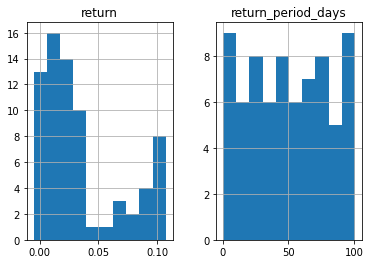

In [55]:
portfolio_data.returns_snapshot.hist();

In [ ]:
por

price_date
1978-12-29    0.281245
1978-12-29    0.338003
1978-12-29    0.286204
1979-01-02    0.281245
1979-01-02    0.338003
                ...   
2021-07-15    0.281245
2021-07-15    0.338003
2021-07-16    0.338003
2021-07-16    0.281245
2021-07-16    0.286204
Name: asset, Length: 31995, dtype: float64

In [114]:
import pandas as pd

price_date
2016-01-04    0.000000
2016-01-05    0.002302
2016-01-06   -0.017404
2016-01-07   -0.022055
2016-01-08   -0.005488
                ...   
2021-07-12    0.005844
2021-07-13   -0.004069
2021-07-14    0.001785
2021-07-15   -0.003773
2021-07-16    0.000462
Length: 1394, dtype: float64

In [242]:
x = (
  current_alloc_returns_df
    .unstack(level = 1)
    ['weighted_return']
    .sum(axis = 1)
)

np.isinf(x).sum()


0

In [367]:
start = '1990-01-01'

current_alloc_returns_df = (
  PortfolioData(orders_df, assets = ['SOXX', 'DHR', 'COST'])
    .prices_snapshot
    .loc[start:]
    .sort_index()
    .assign(
      weight = lambda df: df['asset'].map(portfolio_data.current_allocation),
      
      asset_1d_return = lambda df: df.groupby('asset')['unit_price_usd'].apply(returns.compute_period_returns, periods = 1),
      asset_30d_return = lambda df: df.groupby('asset')['unit_price_usd'].apply(returns.compute_period_returns, periods = 30),
      asset_365d_return = lambda df: df.groupby('asset')['unit_price_usd'].apply(returns.compute_period_returns, periods = 365),
      asset_730d_return = lambda df: df.groupby('asset')['unit_price_usd'].apply(returns.compute_period_returns, periods = 730),
      asset_3650d_return = lambda df: df.groupby('asset')['unit_price_usd'].apply(returns.compute_period_returns, periods = 3650),
      
      weighted_1d_return = lambda df: df['asset_1d_return'] * df['weight'],
      weighted_30d_return = lambda df: df['asset_30d_return'] * df['weight'],
      weighted_365d_return = lambda df: df['asset_365d_return'] * df['weight'],
      weighted_730d_return = lambda df: df['asset_730d_return'] * df['weight'],
      weighted_3650d_return = lambda df: df['asset_3650d_return'] * df['weight'],
    )
    .reset_index()
    .set_index(['price_date', 'asset'])
)

# current_alloc_365_returns = (
#   current_alloc_returns_df
#     .unstack(level = 1)
#     ['weighted_365d_return']
#     .sum(axis = 1)
#     .replace(0, np.nan)
#     .dropna()
# )

current_alloc_730d_returns = (
  current_alloc_returns_df
    .unstack(level = 1)
    ['weighted_730d_return']
    .sum(axis = 1)
    .replace(0, np.nan)
    .dropna()
)

current_alloc_365d_returns = (
  current_alloc_returns_df
    .unstack(level = 1)
    ['weighted_365d_return']
    .sum(axis = 1)
    .replace(0, np.nan)
    .dropna()
)

current_alloc_3650d_returns = (
  current_alloc_returns_df
    .unstack(level = 1)
    ['weighted_3650d_return']
    .sum(axis = 1)
    .replace(0, np.nan)
    .dropna()
)

assert (np.isinf(current_alloc_365_returns).sum()) == 0

# returns_365d[(returns_365d < 150) & (returns_365d > -600)].plot();

# current_alloc_returns

[*********************100%***********************]  3 of 3 completed


/Users/calvindelima/projects/investing/.venv/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



# Backtesting Experiments - August 2

In [383]:
import matplotlib.ticker as mtick

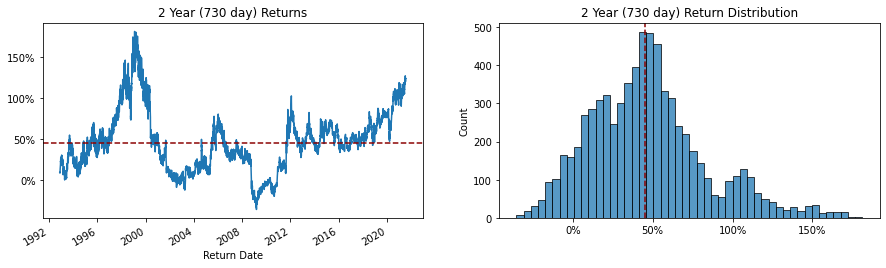

In [391]:
fig = plt.figure(figsize = (15, 4))
plt.subplot(121)
ax = current_alloc_730d_returns.plot();
ax.set_title('2 Year (730 day) Returns')
ax.set_xlabel('Return Date')
ax.axhline(0.45, color = 'darkred', ls = '--');
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1))
plt.subplot(122)
ax = sns.histplot(current_alloc_730d_returns);
ax.set_title('2 Year (730 day) Return Distribution');
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1))
ax.axvline(0.45, color = 'darkred', ls = '--');

We can see how are current allocation has performed for a target of two years (730 days) for the snapshot as of ____ as:

* Series of period-on-period (YoY) returns
* Distribution of period-on-period (YoY) returns

In the distribution, we see three clear regimes which can probably be approximated by a gaussian mixture model. The most likely value at ~40% was our target so this is nice to see, unless we actually chose the target after we chose the portfolio (i.e. we peaked). Luckily, it aligns with what we actually need at the end of the holding period.

In [404]:
print((current_alloc_730d_returns < 0.45).sum(), (current_alloc_730d_returns >= 0.45).sum())
print((current_alloc_730d_returns >= 0.45).sum() / len(current_alloc_730d_returns))

3694 3529
0.4885781531219715


In [402]:
print((current_alloc_730d_returns < 0.35).sum(), (current_alloc_730d_returns >= 0.35).sum())
print((current_alloc_730d_returns >= 0.35).sum() / len(current_alloc_730d_returns))

2752 4471
0.6189948774747335


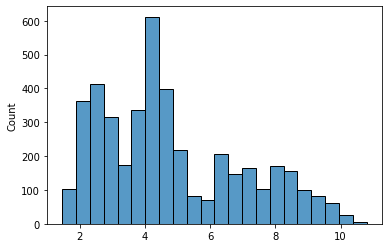

In [371]:
sns.histplot(current_alloc_3650d_returns);

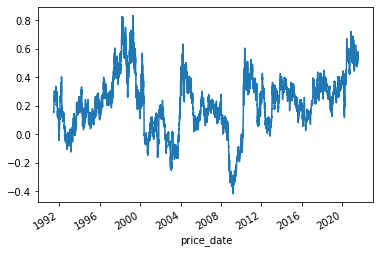

In [366]:
current_alloc_365d_returns.plot();

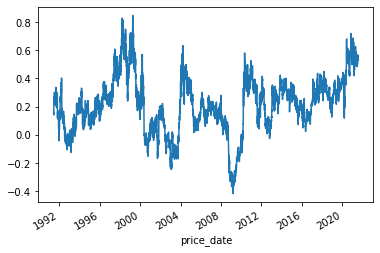

In [368]:
current_alloc_365d_returns.plot();

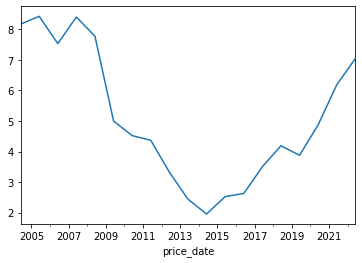

In [364]:
current_alloc_3650d_returns.resample('12M').mean().plot();

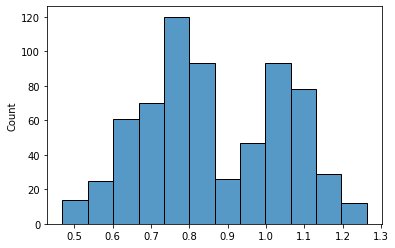

In [347]:
sns.histplot(current_alloc_730d_returns);

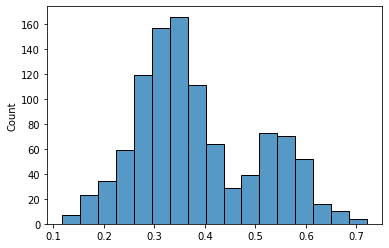

In [352]:
sns.histplot(current_alloc_365d_returns);

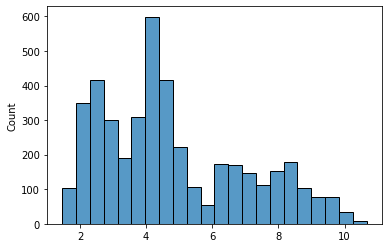

In [365]:
sns.histplot(current_alloc_3650d_returns);

In [306]:
returns.annualize_returns(current_alloc_returns_df['weighted_1d_return'], 365)

0.11727515157533164

In [315]:
returns.annualize_returns(current_alloc_returns_df['weighted_730d_return'], 1)

0.12843660156901393

In [272]:
a = (
  current_alloc_returns_df
    .unstack(level = 1)
    ['weighted_return']
    .sum(axis = 1)
    .replace(0, np.nan)
    .dropna()
)

In [265]:
-0.011048*0.281245

-0.00310719476

In [257]:
(
  portfolio_data
    .prices_snapshot
    .loc[start:]
    .sort_index()
    .groupby('asset')['unit_price_usd'].apply(pd.Series.pct_change).head(10)
)

price_date
2016-01-04         NaN
2016-01-04         NaN
2016-01-04         NaN
2016-01-05    0.002343
2016-01-05    0.004693
2016-01-05    0.000887
2016-01-06   -0.010340
2016-01-06   -0.011048
2016-01-06   -0.033541
2016-01-07   -0.022514
Name: unit_price_usd, dtype: float64

In [248]:
ix = pd.IndexSlice

In [258]:
current_alloc_returns_df.loc[ix[:, ['COST']], 'unit_price_usd'].pct_change().head()

price_date  asset
2016-01-04  COST          NaN
2016-01-05  COST     0.002343
2016-01-06  COST    -0.010340
2016-01-07  COST    -0.022514
2016-01-08  COST    -0.006748
Name: unit_price_usd, dtype: float64

In [228]:
(150.906914 / 150.554199 - 1) * 0.281245

0.000658894476765771

In [231]:
(85.740734	 / 85.664719	 - 1) * 0.286204

0.0002539644945312642

In [82]:
portfolio_data.current_allocation.map()

asset
COST    0.281245
DHR     0.338003
SOXX    0.286204
Name: 2021-07-16 00:00:00, dtype: float64

In [52]:
365 / n_days

3.613861386138614

In [45]:
portfolio_data.returns_snapshot

,return,return_period_days
snapshot_date,,
2021-04-06,-0.001513,0
2021-04-07,-0.001842,1
2021-04-08,0.004176,2
2021-04-09,-0.002294,3
2021-04-12,0.000933,6
...,...,...
2021-07-12,0.107244,97
2021-07-13,0.101970,98
2021-07-14,0.103780,99


## Monthly

In [41]:
portfolio_data.returns_snapshot['return']

snapshot_date
2021-04-06   -0.001513
2021-04-07   -0.001842
2021-04-08    0.004176
2021-04-09   -0.002294
2021-04-12    0.000933
                ...   
2021-07-12    0.107244
2021-07-13    0.101970
2021-07-14    0.103780
2021-07-15    0.101402
2021-07-16    0.104421
Name: return, Length: 72, dtype: float64

In [40]:
returns.annualize_returns(portfolio_data.returns_snapshot['return'], 365)

217888.34301504534

In [38]:
portfolio_data.returns_snapshot

,return,return_period_days
snapshot_date,,
2021-04-06,-0.001513,0
2021-04-07,-0.001842,1
2021-04-08,0.004176,2
2021-04-09,-0.002294,3
2021-04-12,0.000933,6
...,...,...
2021-07-12,0.107244,97
2021-07-13,0.101970,98
2021-07-14,0.103780,99
